In [1]:
#importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis 
from scipy.stats import skew
from factor_analyzer import FactorAnalyzer

In [3]:
#read csv file

In [4]:
df = pd.read_csv('/Users/ganiyuopeyemi/desktop/New Seminar/soep_is_2019_seminar/soep_is_behav_econ_seminar_numval.csv', encoding='latin1')
df

,cid,hid,pid,syear,sex,gebjahr,plh0197,plh0198,plh0199,plh0200,...,ivd03_7,ivd03_8,ivd03_9,ivd03_10,ivd03_11,ptpe18_split2,ptpe18_10,ptpe18_11,im_bmas_onl,bmas_onl_f4
0,200093,200093,2000901,1998,1,1954,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
1,200093,200093,2000901,1999,1,1954,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
2,200093,200093,2000901,2000,1,1954,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
3,200093,200093,2000901,2001,1,1954,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
4,200093,200093,2000901,2002,1,1954,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31055,4905895,4905895,49058901,2018,2,1967,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
31056,4905895,4905895,49058901,2019,2,1967,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
31057,4905895,4905895,49058902,2014,1,1965,1,-1,2,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
31058,4905895,4905895,49058902,2015,1,1965,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,0,-5


In [5]:
#checking for null values

In [6]:
df.isna().sum()

cid              0
hid              0
pid              0
syear            0
sex              0
                ..
ptpe18_split2    0
ptpe18_10        0
ptpe18_11        0
im_bmas_onl      0
bmas_onl_f4      0
Length: 431, dtype: int64

In [7]:
#list(df.columns)

In [8]:
df.columns

Index(['cid', 'hid', 'pid', 'syear', 'sex', 'gebjahr', 'plh0197', 'plh0198',
       'plh0199', 'plh0200',
       ...
       'ivd03_7', 'ivd03_8', 'ivd03_9', 'ivd03_10', 'ivd03_11',
       'ptpe18_split2', 'ptpe18_10', 'ptpe18_11', 'im_bmas_onl',
       'bmas_onl_f4'],
      dtype='object', length=431)

In [9]:
#creating a new dataframe from df

In [10]:
df_1 = df[['pid','syear','sex','gebjahr','biss1','biss2',
           'biss3','biss4','biss5','biss6','biss7','biss8']]

In [11]:
df_1.head()

,pid,syear,sex,gebjahr,biss1,biss2,biss3,biss4,biss5,biss6,biss7,biss8
0,2000901,1998,1,1954,-5,-5,-5,-5,-5,-5,-5,-5
1,2000901,1999,1,1954,-5,-5,-5,-5,-5,-5,-5,-5
2,2000901,2000,1,1954,-5,-5,-5,-5,-5,-5,-5,-5
3,2000901,2001,1,1954,-5,-5,-5,-5,-5,-5,-5,-5
4,2000901,2002,1,1954,-5,-5,-5,-5,-5,-5,-5,-5


In [12]:
#checking the dimension of the dataframe

In [13]:
df_1.shape

(31060, 12)

In [14]:
#droping the value of -5 and -1 in df_1

In [15]:
df_1 = df_1.drop(df_1[df_1.isin({-5}).any(1)].index)

In [16]:
df_1 = df_1.drop(df_1[df_1.isin({-1}).any(1)].index)

In [17]:
df_1.head()

,pid,syear,sex,gebjahr,biss1,biss2,biss3,biss4,biss5,biss6,biss7,biss8
51,2001401,2015,1,1955,1,1,1,1,5,5,5,4
73,2001402,2015,2,1957,1,1,2,1,5,5,5,4
79,2001403,2015,1,1996,2,2,2,1,4,3,4,4
101,2005001,2015,2,1949,2,3,2,3,3,4,3,2
130,2006701,2015,2,1962,4,2,1,1,5,3,4,4


In [18]:
#checking for the unique year 

In [19]:
df_1["syear"].unique()

array([2015, 2017])

In [20]:
#checking the dimension df_1

In [21]:
df_1.shape

(1857, 12)

In [22]:
#dropping some variables

In [23]:
df_1.drop(['sex','pid','syear','gebjahr'], axis='columns', inplace=True)

In [24]:
#Statistical analsysis on the df_1

In [25]:
df_1.describe()

,biss1,biss2,biss3,biss4,biss5,biss6,biss7,biss8
count,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,2.685514,2.767367,2.744750,2.334949,4.058158,3.834141,4.289176,3.844911
std,1.173601,1.209139,1.307103,1.264498,0.984174,1.073012,0.796582,1.073619
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,4.000000,3.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
#Correlation of Grit items 
df_1.corr()

,biss1,biss2,biss3,biss4,biss5,biss6,biss7,biss8
biss1,1.000000,0.393789,0.378603,0.277966,-0.207599,-0.117173,-0.129168,-0.060110
biss2,0.393789,1.000000,0.398770,0.252912,-0.215913,-0.101599,-0.167860,-0.047314
biss3,0.378603,0.398770,1.000000,0.364698,-0.259020,-0.107801,-0.179007,-0.091958
biss4,0.277966,0.252912,0.364698,1.000000,-0.225639,-0.155995,-0.159864,-0.145865
biss5,-0.207599,-0.215913,-0.259020,-0.225639,1.000000,0.329548,0.443122,0.271148
biss6,-0.117173,-0.101599,-0.107801,-0.155995,0.329548,1.000000,0.240208,0.192801
biss7,-0.129168,-0.167860,-0.179007,-0.159864,0.443122,0.240208,1.000000,0.454409
biss8,-0.060110,-0.047314,-0.091958,-0.145865,0.271148,0.192801,0.454409,1.000000


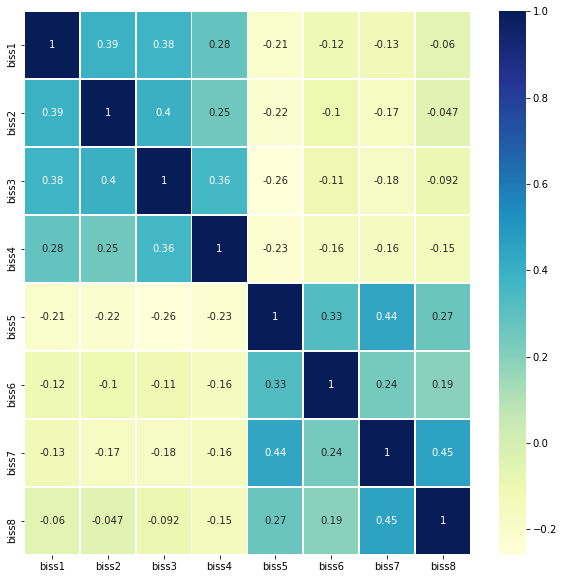

In [27]:
#Correlation map
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_1.corr(), annot=True, linewidths=.5, cmap="YlGnBu");

In [28]:
#Covariance of the Grit items
df_1.cov()

,biss1,biss2,biss3,biss4,biss5,biss6,biss7,biss8
biss1,1.377339,0.558805,0.580783,0.412505,-0.239782,-0.147555,-0.120755,-0.075739
biss2,0.558805,1.462016,0.630243,0.386691,-0.256937,-0.131816,-0.161679,-0.061422
biss3,0.580783,0.630243,1.708519,0.602783,-0.333207,-0.151195,-0.186385,-0.129047
biss4,0.412505,0.386691,0.602783,1.598956,-0.280805,-0.211657,-0.161028,-0.198025
biss5,-0.239782,-0.256937,-0.333207,-0.280805,0.968599,0.348013,0.347397,0.286503
biss6,-0.147555,-0.131816,-0.151195,-0.211657,0.348013,1.151355,0.205316,0.222108
biss7,-0.120755,-0.161679,-0.186385,-0.161028,0.347397,0.205316,0.634543,0.388622
biss8,-0.075739,-0.061422,-0.129047,-0.198025,0.286503,0.222108,0.388622,1.152659


In [29]:
#factor analysis on items on Grit and Entrepreneurship 
fa = FactorAnalyzer(n_factors =2, rotation = 'varimax')

In [30]:
fa.fit(df_1)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [31]:
#Get the loadings
loadings = fa.loadings_

In [32]:
loadings

array([[ 0.59526901, -0.08350961],
       [ 0.59531454, -0.09649455],
       [ 0.65363795, -0.13684216],
       [ 0.45292354, -0.19112148],
       [-0.28002435,  0.56039438],
       [-0.13730904,  0.37043913],
       [-0.11259672,  0.73708921],
       [-0.01416124,  0.56301299]])

In [33]:
# Putting the loadings in the dataframe 
pd.DataFrame(loadings,columns=['Factor 1', 'Factor 2'], index=df_1.columns)

,Factor 1,Factor 2
biss1,0.595269,-0.083510
biss2,0.595315,-0.096495
biss3,0.653638,-0.136842
biss4,0.452924,-0.191121
biss5,-0.280024,0.560394
biss6,-0.137309,0.370439
biss7,-0.112597,0.737089
biss8,-0.014161,0.563013


In [34]:
e_val,e_vec = fa.get_eigenvalues()

In [35]:
#Getting eigen values
e_val

array([2.62094525, 1.44266729, 0.86003005, 0.77999127, 0.65645787,
       0.60114474, 0.56433848, 0.47442506])

In [36]:
#Getting the eigen vectors
e_vec

array([ 2.0000986 ,  0.83426358,  0.13051208,  0.08902426,  0.0203161 ,
       -0.05044307, -0.07837326, -0.11103603])

In [37]:
#Do a Scree Plot
xvals = range(1, df_1.shape[1]+1)

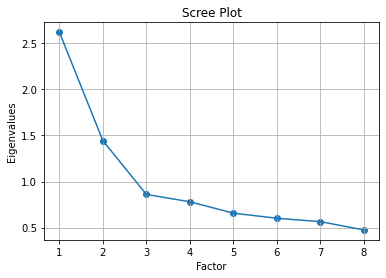

In [38]:
plt.scatter(xvals, e_val)
plt.plot(xvals, e_val)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

The Scree Plot suggest two latent factors in the Grit Survey.

In [39]:
#Rotation Matrix
fa.rotation_matrix_

array([[ 0.72749045,  0.68611781],
       [-0.68611781,  0.72749045]])

In [40]:
#Squared of the loadings
fa.get_communalities()

array([0.36131905, 0.3637106 , 0.44596835, 0.24166715, 0.3924555 ,
       0.15607892, 0.55597852, 0.31718417])

In [41]:
#Estimate Cronbach’s α (internal consistency) for composite scale(s)

In [42]:
import pingouin as pg

In [43]:
factors_grit_ent1 = df_1[['biss5','biss6','biss7','biss8']]
alpha_grit = pg.cronbach_alpha(factors_grit_ent1)
print(alpha_grit)

(0.6390125180790537, array([0.611, 0.665]))


/Users/ganiyuopeyemi/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/ganiyuopeyemi/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


The Cronbach's alpha value for the measurement of Grit's item is 0.64, this value shows the degree to which all the items of the scale really measure the same concept and this value is acceptable.

In [44]:
factors_grit_ent2 = df_1[['biss1','biss2','biss3','biss4']]
alpha_ent = pg.cronbach_alpha(factors_grit_ent2)
print(alpha_ent)

(0.6771702981613195, array([0.653, 0.7  ]))


The Cronbach's alpha value for the Grit & Entrepreneurship item is 0.68, this value shows the degree to which all the items of 
the scale really measure the same concept and the value is acceptable

In [45]:
#creating new dataframe for items on Big5

In [46]:
df_3 = df[['pid','syear','plh0215','plh0220',
          'plh0225','plh0212','plh0218','plh0222',
           'plh0213','plh0219','plh0223','plh0216',
           'plh0221','plh0226','plh0214','plh0217','plh0224']]

In [47]:
df_3.head()

,pid,syear,plh0215,plh0220,plh0225,plh0212,plh0218,plh0222,plh0213,plh0219,plh0223,plh0216,plh0221,plh0226,plh0214,plh0217,plh0224
0,2000901,1998,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
1,2000901,1999,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
2,2000901,2000,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
3,2000901,2001,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
4,2000901,2002,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5


In [48]:
df_3.shape

(31060, 17)

In [49]:
#cleaning df_3
df_3 = df_3.drop(df_3[df_3.isin({-5}).any(1)].index)
df_3 = df_3.drop(df_3[df_3.isin({-1}).any(1)].index)

In [50]:
df_3.shape

(12537, 17)

In [51]:
#Recoding

In [52]:
df_3['plh0218'] = df_3['plh0218'].transform(lambda x: 8-x)
df_3['plh0223'] = df_3['plh0223'].transform(lambda x: 8-x)
df_3['plh0226'] = df_3['plh0226'].transform(lambda x: 8-x)
df_3['plh0214'] = df_3['plh0214'].transform(lambda x: 8-x)

In [53]:
df_3.head()

,pid,syear,plh0215,plh0220,plh0225,plh0212,plh0218,plh0222,plh0213,plh0219,plh0223,plh0216,plh0221,plh0226,plh0214,plh0217,plh0224
7,2000901,2005,4,4,3,7,2,7,4,4,4,7,6,5,3,6,6
11,2000901,2009,4,2,3,7,6,6,4,4,3,6,4,4,3,6,6
21,2000902,2005,7,7,7,7,5,7,7,7,7,4,1,1,7,7,7
25,2000902,2009,6,4,6,6,4,6,6,6,6,4,2,1,7,6,6
29,2000903,2009,6,7,5,6,5,6,7,7,3,7,2,2,6,7,7


In [54]:
#creating a new dataframe df_31 from df_3

In [55]:
df_31 = df_3[['plh0215','plh0220',
          'plh0225','plh0212','plh0218','plh0222',
           'plh0213','plh0219','plh0223','plh0216',
           'plh0221','plh0226','plh0214','plh0217','plh0224']]

In [56]:
df_31.corr()

,plh0215,plh0220,plh0225,plh0212,plh0218,plh0222,plh0213,plh0219,plh0223,plh0216,plh0221,plh0226,plh0214,plh0217,plh0224
plh0215,1.000000,0.287344,0.432649,0.186443,0.051444,0.278673,0.361446,0.354531,0.176617,0.032976,-0.067464,-0.205231,-0.161275,0.127911,0.137920
plh0220,0.287344,1.000000,0.305450,0.083225,0.020209,0.114064,0.211630,0.195383,0.028430,0.049148,0.059241,-0.055628,0.056195,0.109104,0.164449
plh0225,0.432649,0.305450,1.000000,0.070134,-0.039176,0.150710,0.276246,0.292951,0.115723,0.057951,0.026514,-0.144749,-0.063224,0.113566,0.182183
plh0212,0.186443,0.083225,0.070134,1.000000,0.338475,0.499137,0.239527,0.143620,-0.039834,0.056072,-0.053857,-0.131028,0.048624,0.143199,0.243466
plh0218,0.051444,0.020209,-0.039176,0.338475,1.000000,0.279663,0.134335,0.065721,0.011999,0.023077,-0.113951,-0.053321,0.179210,0.068080,0.159657
plh0222,0.278673,0.114064,0.150710,0.499137,0.279663,1.000000,0.269157,0.246265,-0.008222,0.038786,-0.054854,-0.193712,0.032763,0.167903,0.301955
plh0213,0.361446,0.211630,0.276246,0.239527,0.134335,0.269157,1.000000,0.585091,0.323841,0.034199,-0.041869,-0.164678,-0.038913,0.184413,0.254381
plh0219,0.354531,0.195383,0.292951,0.143620,0.065721,0.246265,0.585091,1.000000,0.340899,-0.007684,-0.070290,-0.196615,-0.029909,0.207418,0.224573
plh0223,0.176617,0.028430,0.115723,-0.039834,0.011999,-0.008222,0.323841,0.340899,1.000000,-0.105790,-0.143479,-0.028839,-0.124881,-0.017304,-0.102067
plh0216,0.032976,0.049148,0.057951,0.056072,0.023077,0.038786,0.034199,-0.007684,-0.105790,1.000000,0.387670,0.270643,-0.104200,0.049868,0.064486


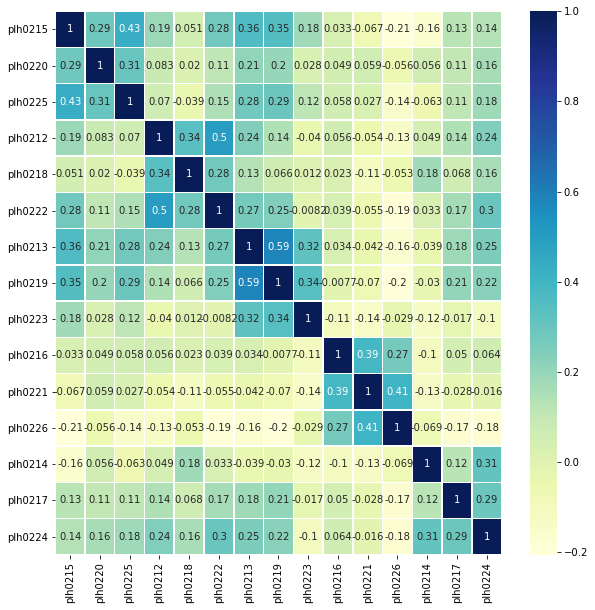

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_31.corr(), annot=True, linewidths=.5, cmap="YlGnBu");

In [58]:
#Estimating Cronbach's Alpha for the Big5

In [59]:
#Cronbach's Alpha for Openness
factors_big5_open = df_3[['plh0215','plh0220','plh0225']]
alpha_big5_1 = pg.cronbach_alpha(factors_big5_open)
print(alpha_big5_1)

(0.5947621074502705, array([0.582, 0.607]))


In [60]:
#Cronbach's Alpha for Conscientiousness
factors_big5_consc = df_3[['plh0212','plh0218','plh0222']]
alpha_big5_2 = pg.cronbach_alpha(factors_big5_consc)
print(alpha_big5_2)

(0.5980814795725002, array([0.586, 0.61 ]))


In [61]:
#Cronbach's Alpha for Extraversion
factors_big5_extra = df_3[['plh0213', 'plh0219','plh0223']]
alpha_big5_3 = pg.cronbach_alpha(factors_big5_extra)
print(alpha_big5_3)

(0.6717852480269318, array([0.662, 0.682]))


In [62]:
#Cronbach's Alpha for Neuroticism
factors_big5_neuro = df_3[['plh0216','plh0221','plh0226']]
alpha_big5_4 = pg.cronbach_alpha(factors_big5_neuro)
print(alpha_big5_4)

(0.621194790179767, array([0.61 , 0.633]))


In [63]:
#Cronbach's Alpha for Agreeableness
factors_big5_agree = df_3[['plh0214','plh0217','plh0224']]
alpha_big5_5 = pg.cronbach_alpha(factors_big5_agree)
print(alpha_big5_5)

(0.45186834512883456, array([0.435, 0.468]))


In [64]:
#Creating new dataframe for Grit, Entrepreneurship  and Big5

In [65]:
df_11= df[['pid','syear','sex','gebjahr','pgstib','biss1','biss2',
           'biss3','biss4','biss5','biss6','biss7','biss8','plh0215','plh0220',
          'plh0225','plh0212','plh0218','plh0222',
           'plh0213','plh0219','plh0223','plh0216',
           'plh0221','plh0226','plh0214','plh0217','plh0224']]

In [66]:
#cleaning the df_11 
df_11 = df_11.drop(df_11[df_11.isin({-5}).any(1)].index)
df_11 = df_11.drop(df_11[df_11.isin({-2}).any(1)].index)
df_11 = df_11.drop(df_11[df_11.isin({-1}).any(1)].index)

In [67]:
#Recoding some items of big5
df_11['plh0218'] = df_11['plh0218'].transform(lambda x: 8-x)
df_11['plh0223'] = df_11['plh0223'].transform(lambda x: 8-x)
df_11['plh0226'] = df_11['plh0226'].transform(lambda x: 8-x)
df_11['plh0214'] = df_11['plh0214'].transform(lambda x: 8-x)

In [68]:
#Recoding items of Entrepreneurship (Self employed and employed)
df_11 = df_11.replace(to_replace =[411, 412, 413, 421, 422, 423, 431, 432, 433],value = 1)
df_11 = df_11.replace(to_replace =[520, 521, 522, 530, 540, 550, 610, 620, 630, 640],value = 2)

In [69]:
df_11.head()

,pid,syear,sex,gebjahr,pgstib,biss1,biss2,biss3,biss4,biss5,...,plh0222,plh0213,plh0219,plh0223,plh0216,plh0221,plh0226,plh0214,plh0217,plh0224
51,2001401,2015,1,1955,2,1,1,1,1,5,...,7,5,3,4,4,2,5,6,5,6
73,2001402,2015,2,1957,2,1,1,2,1,5,...,6,5,5,4,2,2,2,6,7,5
79,2001403,2015,1,1996,10,2,2,2,1,4,...,6,5,4,3,6,2,2,4,5,6
101,2005001,2015,2,1949,13,2,3,2,3,3,...,6,6,6,3,4,3,3,5,6,7
130,2006701,2015,2,1962,2,4,2,1,1,5,...,5,6,5,3,6,2,5,3,6,6


In [70]:
#Getting the mean of grit and big5 items
df_11["grit1"] = (df_11["biss1"]+df_11["biss2"]+df_11["biss3"]+df_11["biss4"])/4
df_11["grit2"] = (df_11["biss5"]+df_11["biss6"]+df_11["biss7"]+df_11["biss8"])/4
df_11["openn"] = (df_11["plh0215"]+df_11["plh0220"]+df_11["plh0225"])/3
df_11["consc"] = (df_11["plh0212"]+df_11["plh0218"]+df_11["plh0222"])/3
df_11["extra"] = (df_11["plh0213"]+df_11["plh0219"]+df_11["plh0223"])/3
df_11["neuro"] = (df_11["plh0216"]+df_11["plh0221"]+df_11["plh0226"])/3
df_11["agree"] = (df_11["plh0214"]+df_11["plh0217"]+df_11["plh0224"])/3


In [71]:
df_11.shape

(1816, 35)

In [72]:
#getting the age 
df_11['age'] = df_11["syear"] - df_11['gebjahr']

In [73]:
#getting the number of unique ages in df_11
len(df_11.age.unique())

77

In [74]:
#getting the minimum age in df_11
df_11.age.min()

17

In [75]:
#getting the maximum age in df_11
df_11.age.max()

94

In [76]:
#choosing the age bracket for our analysis
df_11 = df_11[(df_11['age'] >= 25) & (df_11['age'] <= 65)]

In [77]:
#confirming the new age bracket
df_11.age.min()

25

In [78]:
#confirming the new age bracket
df_11.age.max()

65

In [79]:
#dropping some variables 
df_11.drop(['biss1','biss2',
           'biss3','biss4','biss5','biss6','biss7','biss8','plh0215','plh0220',
          'plh0225','plh0212','plh0218','plh0222',
           'plh0213','plh0219','plh0223','plh0216',
           'plh0221','plh0226','plh0214','plh0217','plh0224','gebjahr'], axis='columns', inplace=True)

In [80]:
#creating a self empoyed dataset 
df_11_self = df_11[df_11["pgstib"]==1]

In [81]:
#shape of self-employed dataset
df_11_self.shape

(82, 12)

In [82]:
#creating employed dataset
df_11_employed = df_11[df_11["pgstib"]==2]

In [83]:
#shape of employed dataset
df_11_employed.shape

(639, 12)

In [84]:
df_11_self.head()

,pid,syear,sex,pgstib,grit1,grit2,openn,consc,extra,neuro,agree,age
1048,2024101,2015,1,1,3.00,4.25,4.666667,7.000000,3.000000,2.000000,5.333333,61
1093,2024401,2015,2,1,2.75,4.25,4.666667,5.333333,3.666667,2.666667,4.666667,63
3757,2102501,2015,1,1,3.00,4.00,4.333333,6.000000,4.333333,4.000000,4.000000,46
4569,2124204,2015,1,1,1.00,4.25,5.000000,6.000000,6.000000,1.666667,6.000000,27
4714,2127401,2015,2,1,4.00,3.25,6.333333,5.333333,6.000000,5.666667,4.333333,54


In [85]:
df_11_employed.head()

,pid,syear,sex,pgstib,grit1,grit2,openn,consc,extra,neuro,agree,age
51,2001401,2015,1,2,1.00,4.75,5.000000,7.000000,4.000000,3.666667,5.666667,60
73,2001402,2015,2,2,1.25,4.75,6.000000,6.000000,4.666667,2.000000,6.000000,58
130,2006701,2015,2,2,2.00,4.00,4.333333,5.000000,4.666667,4.333333,5.000000,53
151,2006703,2015,1,2,2.25,4.25,4.666667,5.666667,3.000000,2.666667,4.666667,51
336,2011202,2015,1,2,1.25,4.75,4.333333,7.000000,5.666667,3.333333,5.000000,39


In [86]:
#Analyzing linear relationship between Grit variables and control variables like big5, age

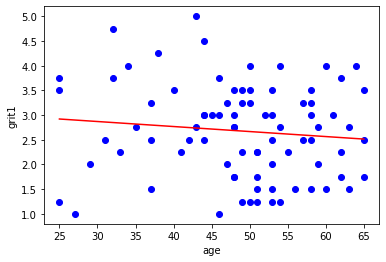

In [87]:
from scipy import stats
x = df_11_self["age"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("age")
plt.ylabel("grit1")
plt.show()

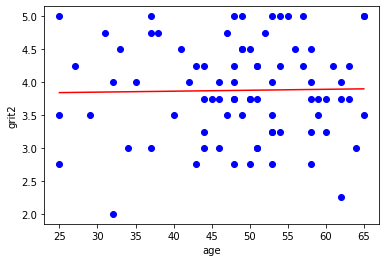

In [88]:
from scipy import stats
x = df_11_self["age"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("age")
plt.ylabel("grit2")
plt.show()

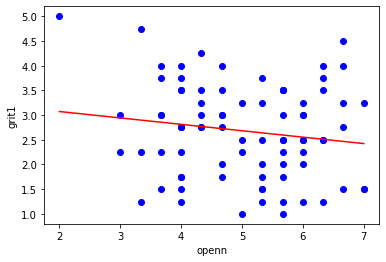

In [89]:
from scipy import stats
x = df_11_self["openn"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("openn")
plt.ylabel("grit1")
plt.show()

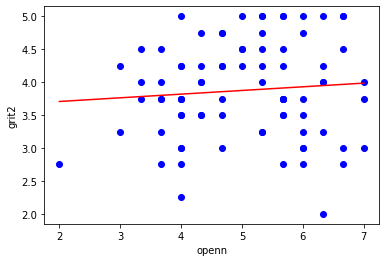

In [90]:
x = df_11_self["openn"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("openn")
plt.ylabel("grit2")
plt.show()

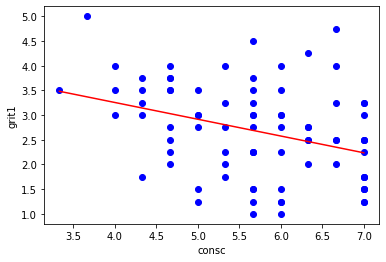

In [91]:
x = df_11_self["consc"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("consc")
plt.ylabel("grit1")
plt.show()

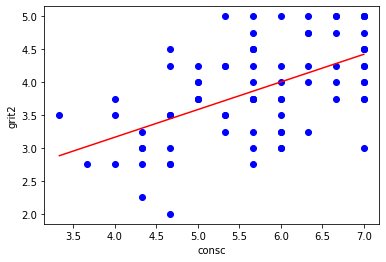

In [92]:
x = df_11_self["consc"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("consc")
plt.ylabel("grit2")
plt.show()

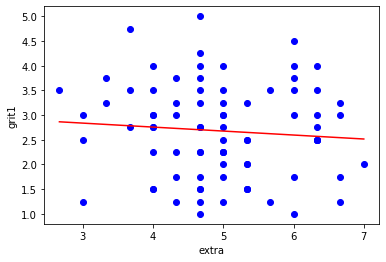

In [93]:
x = df_11_self["extra"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("extra")
plt.ylabel("grit1")
plt.show()

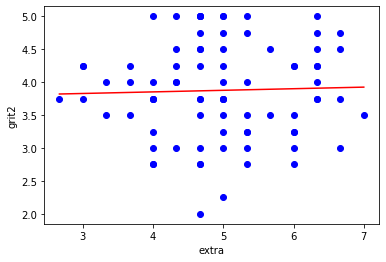

In [94]:
x = df_11_self["extra"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("extra")
plt.ylabel("grit2")
plt.show()

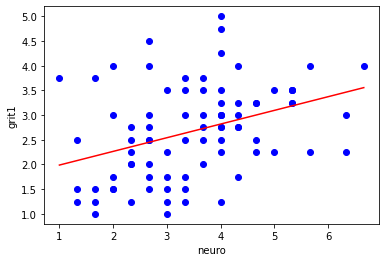

In [95]:
x = df_11_self["neuro"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("neuro")
plt.ylabel("grit1")
plt.show()


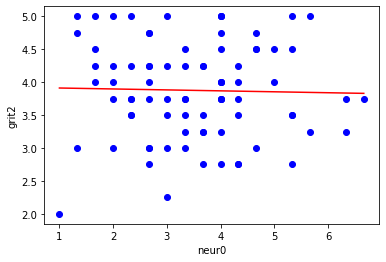

In [96]:
x = df_11_self["neuro"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("neur0")
plt.ylabel("grit2")
plt.show()

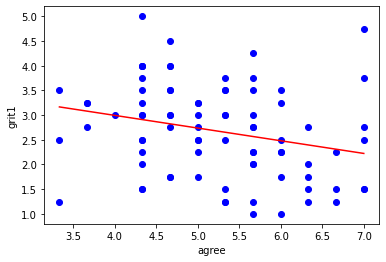

In [97]:
x = df_11_self["agree"]
y = df_11_self["grit1"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("agree")
plt.ylabel("grit1")
plt.show()

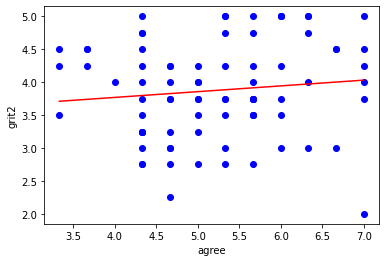

In [98]:
x = df_11_self["agree"]
y = df_11_self["grit2"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("agree")
plt.ylabel("grit2")
plt.show()

In [99]:
df_11_self.head()

,pid,syear,sex,pgstib,grit1,grit2,openn,consc,extra,neuro,agree,age
1048,2024101,2015,1,1,3.00,4.25,4.666667,7.000000,3.000000,2.000000,5.333333,61
1093,2024401,2015,2,1,2.75,4.25,4.666667,5.333333,3.666667,2.666667,4.666667,63
3757,2102501,2015,1,1,3.00,4.00,4.333333,6.000000,4.333333,4.000000,4.000000,46
4569,2124204,2015,1,1,1.00,4.25,5.000000,6.000000,6.000000,1.666667,6.000000,27
4714,2127401,2015,2,1,4.00,3.25,6.333333,5.333333,6.000000,5.666667,4.333333,54


In [100]:
df_11_self.syear.unique()

array([2015, 2017])

In [101]:
df_11_self.head()

,pid,syear,sex,pgstib,grit1,grit2,openn,consc,extra,neuro,agree,age
1048,2024101,2015,1,1,3.00,4.25,4.666667,7.000000,3.000000,2.000000,5.333333,61
1093,2024401,2015,2,1,2.75,4.25,4.666667,5.333333,3.666667,2.666667,4.666667,63
3757,2102501,2015,1,1,3.00,4.00,4.333333,6.000000,4.333333,4.000000,4.000000,46
4569,2124204,2015,1,1,1.00,4.25,5.000000,6.000000,6.000000,1.666667,6.000000,27
4714,2127401,2015,2,1,4.00,3.25,6.333333,5.333333,6.000000,5.666667,4.333333,54


In [102]:
df_11_self.shape

(82, 12)

In [103]:
df_11_self.columns

Index(['pid', 'syear', 'sex', 'pgstib', 'grit1', 'grit2', 'openn', 'consc',
       'extra', 'neuro', 'agree', 'age'],
      dtype='object')

In [104]:
df_11_self['syear'].unique()

array([2015, 2017])

In [105]:
df_11_self.isna().sum()

pid       0
syear     0
sex       0
pgstib    0
grit1     0
grit2     0
openn     0
consc     0
extra     0
neuro     0
agree     0
age       0
dtype: int64

In [106]:
syear = pd.Categorical(df_11_self.syear) 
df_11_self = df_11_self.set_index(['pid', 'syear']) 
df_11_self['syear'] = syear 

In [107]:
df_2015 = df_11_self[df_11_self["syear"]==2015]
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 55 entries, (2024101, 2015) to (9758002, 2015)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     55 non-null     int64   
 1   pgstib  55 non-null     int64   
 2   grit1   55 non-null     float64 
 3   grit2   55 non-null     float64 
 4   openn   55 non-null     float64 
 5   consc   55 non-null     float64 
 6   extra   55 non-null     float64 
 7   neuro   55 non-null     float64 
 8   agree   55 non-null     float64 
 9   age     55 non-null     int64   
 10  syear   55 non-null     category
dtypes: category(1), float64(7), int64(3)
memory usage: 5.3 KB


In [108]:
df_2017 = df_11_self[df_11_self["syear"]==2017]
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, (41277601, 2017) to (41730002, 2017)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     27 non-null     int64   
 1   pgstib  27 non-null     int64   
 2   grit1   27 non-null     float64 
 3   grit2   27 non-null     float64 
 4   openn   27 non-null     float64 
 5   consc   27 non-null     float64 
 6   extra   27 non-null     float64 
 7   neuro   27 non-null     float64 
 8   agree   27 non-null     float64 
 9   age     27 non-null     int64   
 10  syear   27 non-null     category
dtypes: category(1), float64(7), int64(3)
memory usage: 3.1 KB


In [109]:
df_2015.shape

(55, 11)

In [110]:
# Multiple linear Regression on Grit and Entrepreneurship with Statsmodels

# Grit1 & Self-Employed

1st iteration: grit1

In [111]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:51   Log-likelihood                    2884.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -80.000
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(1,80)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             5.8290
                            

2nd iteration: grit1 & age

In [112]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','age']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:51   Log-likelihood                    2734.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             0.8401
                            

3rd iteration: grit1 & sex

In [113]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','sex']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:51   Log-likelihood                    2779.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             6.3994
                            

4th iteration: grit1 & neuroticism 

In [114]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','neuro']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:51   Log-likelihood                    2767.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             11.912
                            

5th iteration: grit1 & agreeablness

In [115]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','agree']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2788.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             35.347
                            

6th iteration: grit1 & extraversion

In [116]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','extra']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2756.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             1.2066
                            

7th iteration: grit1 & Openness

In [117]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','openn']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2780.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             1.4212
                            

8th iteration: grit1 & consciousness 

In [118]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','consc']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2752.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             1.5707
                            

# Grit2 & Self-Employed

10th iteration: grit2 

In [119]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2951.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -80.000
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(1,80)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             34.479
                            

11th iteration: grit2 & sex

In [120]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','sex']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2859.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             5.8977
                            

12th iteration: grit2 & age

In [121]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','age']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2718.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             2.5147
                            

13th iteration: grit2 & neuroticism 

In [122]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','neuro']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2906.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             17.911
                            

14th iteration: grit2 & agreeableness

In [123]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','agree']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2781.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             35.082
                            

15th iteration: grit2 & extraversion

In [124]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','extra']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2856.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             33.616
                            

16th iteration: grit2 & openness

In [125]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','openn']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2895.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             35.686
                            

17th iteration: grit2 & conscioustness

In [126]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','consc']
exog = sm.add_constant(df_11_self[exog_vars])
mod = PanelOLS(df_11_self.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  82   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                    2648.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -39.500
Entities:                          82   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                    F(2,79)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             39.485
                            

In [127]:
# Multiple linear Regression on Grit and Entrepreneurship(Employed) 

In [128]:
df_11_employed.head()

,pid,syear,sex,pgstib,grit1,grit2,openn,consc,extra,neuro,agree,age
51,2001401,2015,1,2,1.00,4.75,5.000000,7.000000,4.000000,3.666667,5.666667,60
73,2001402,2015,2,2,1.25,4.75,6.000000,6.000000,4.666667,2.000000,6.000000,58
130,2006701,2015,2,2,2.00,4.00,4.333333,5.000000,4.666667,4.333333,5.000000,53
151,2006703,2015,1,2,2.25,4.25,4.666667,5.666667,3.000000,2.666667,4.666667,51
336,2011202,2015,1,2,1.25,4.75,4.333333,7.000000,5.666667,3.333333,5.000000,39


In [129]:
syear = pd.Categorical(df_11_employed.syear) 
df_11_employed = df_11_employed.set_index(['pid', 'syear']) 
df_11_employed['syear'] = syear 

In [130]:
df_11_employed.shape

(639, 11)

In [131]:
df_11_employed.isna().sum()

sex       0
pgstib    0
grit1     0
grit2     0
openn     0
consc     0
extra     0
neuro     0
agree     0
age       0
syear     0
dtype: int64

In [132]:
df_2015_employed = df_11_employed[df_11_employed["syear"]==2015]
df_2015_employed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 462 entries, (2001401, 2015) to (9823501, 2015)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     462 non-null    int64   
 1   pgstib  462 non-null    int64   
 2   grit1   462 non-null    float64 
 3   grit2   462 non-null    float64 
 4   openn   462 non-null    float64 
 5   consc   462 non-null    float64 
 6   extra   462 non-null    float64 
 7   neuro   462 non-null    float64 
 8   agree   462 non-null    float64 
 9   age     462 non-null    int64   
 10  syear   462 non-null    category
dtypes: category(1), float64(7), int64(3)
memory usage: 43.1 KB


In [133]:
df_2017_employed = df_11_employed[df_11_employed["syear"]==2017]
df_2017_employed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 177 entries, (41271101, 2017) to (41730001, 2017)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     177 non-null    int64   
 1   pgstib  177 non-null    int64   
 2   grit1   177 non-null    float64 
 3   grit2   177 non-null    float64 
 4   openn   177 non-null    float64 
 5   consc   177 non-null    float64 
 6   extra   177 non-null    float64 
 7   neuro   177 non-null    float64 
 8   agree   177 non-null    float64 
 9   age     177 non-null    int64   
 10  syear   177 non-null    category
dtypes: category(1), float64(7), int64(3)
memory usage: 19.7 KB


# Grit1&Employed

18th iteration: grit1 

In [134]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                 2.103e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -637.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(1,637)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             13.797
                            

19th iteration: grit1 & age

In [135]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','age']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                 2.097e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             5.2299
                            

20th iteration: grit1 & sex

In [136]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','sex']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:52   Log-likelihood                 2.148e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             129.20
                            

21th iteration: grit1 & neuroticism

In [137]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','neuro']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.184e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             121.12
                            

22th iteration: grit1 & agreeablness

In [138]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','agree']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.014e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             314.15
                            

23rd iteration: grit1 & extraversion

In [139]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','extra']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.001e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             276.24
                            

24th iteration: grit1 & conscioustness

In [140]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','consc']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.164e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             73.380
                            

25th iteration: grit1 & openness

In [141]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit1','openn']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 1.942e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             318.38
                            

26th iteration: grit2 

In [142]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.087e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -637.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(1,637)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             6.9002
                            

26th iteration: grit2 & age

In [143]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','age']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 1.976e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             8.8376
                            

27th iteration: grit2 & sex

In [144]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','sex']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.073e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             6.9091
                            

28th iteration: grit2 & agreeableness

In [145]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','agree']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.173e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             5.2077
                            

29th iteration: grit2 & extraversion

In [146]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','extra']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.176e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             114.89
                            

30th iteration: grit2 & consciousnesses 

In [147]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','consc']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.072e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             1.1371
                            

31th iteration: grit2 & openness

In [148]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','openn']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.124e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             0.0036
                            

32th iteration: grit2 & Neuroticism 

In [149]:
from linearmodels import PanelOLS
import statsmodels.api as sm
exog_vars = ['grit2','neuro']
exog = sm.add_constant(df_11_employed[exog_vars])
mod = PanelOLS(df_11_employed.pgstib, exog)
Pe_os = mod.fit()
print(Pe_os)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 pgstib   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 639   R-squared (Within):               0.0000
Date:                Tue, Jul 27 2021   R-squared (Overall):              0.0000
Time:                        12:14:53   Log-likelihood                 2.168e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                     -318.00
Entities:                         639   P-value                           1.0000
Avg Obs:                       1.0000   Distribution:                   F(2,636)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             0.3944
                            